In [1]:
from __future__ import print_function
#Show plots inline, and load main getdist plot module and samples class
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'..')))
import numpy as np
from getdist import plots, MCSamples, chains
import getdist, IPython
print('Version: ',getdist.__version__)
# use this *after* importing getdist if you want to use interactive plots
# %matplotlib notebook
import matplotlib.pyplot as plt
import IPython
print('GetDist Version: %s, Matplotlib version: %s'%(getdist.__version__, plt.matplotlib.__version__))
# matplotlib 2 may not work very well without usetex on, can uncomment
# plt.rcParams['text.usetex']=True

Version:  1.1.2
GetDist Version: 1.1.2, Matplotlib version: 3.1.3


In [2]:
download_dir = "./Results/getdist_analysis/"
histograms_dir="confidenceRegions/"
huevos_dir="posteriors/"


In [3]:
#Load from file
from getdist import loadMCSamples, chains, MCSamples

# Load individual samples:
# PISO:
#samples = loadMCSamples('./Results/Chains/IC2574PISO-MCExt', settings={'ignore_rows':0.3})
# It was already burned
samples = loadMCSamples('./Results/Chains/IC2574_PISO-MCExt')


./Results/Chains/IC2574_PISO-MCExt.txt
Removed no burn in


In [4]:
# PISO:
histogram=download_dir+histograms_dir+"IC2574_PISO"+"_histograms.pdf"


In [5]:
# PISO:
huevos=download_dir+huevos_dir+"IC2574_PISO"+"_huevos.pdf"


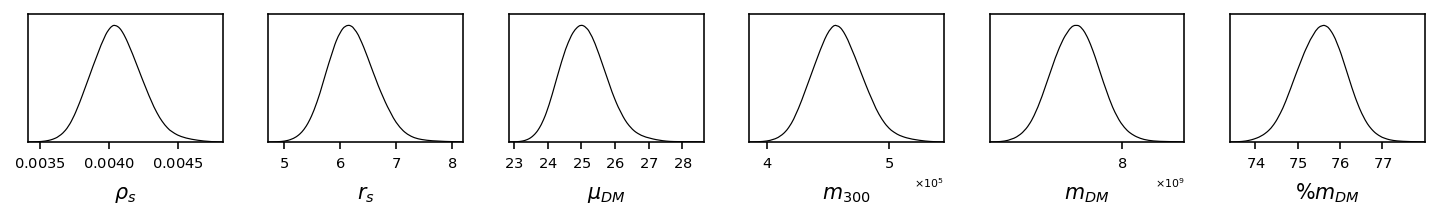

In [6]:
# Multiple 1D subplots

g = plots.get_subplot_plotter(width_inch=10)

# PISO:
g.plots_1d(samples, ['p1', 'p2', 'p3', 'p4','p5','p6'], nx=6);
g.export(histogram)


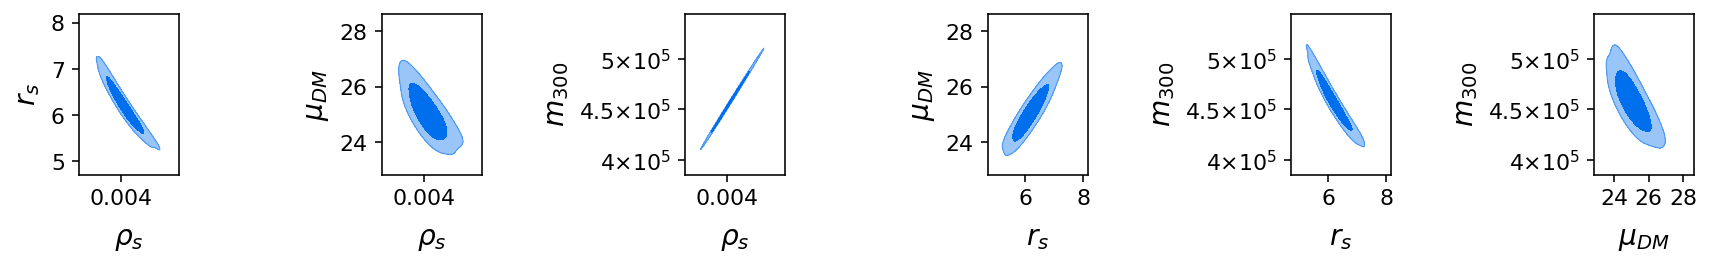

In [7]:
# Multiple 2D subplots
g = plots.get_subplot_plotter(subplot_size=2.0)
g.settings.scaling = False # prevent scaling down font sizes even though small subplots

# PISO:
g.plots_2d(samples, param_pairs=[['p1', 'p2'], ['p1', 'p3'],['p1', 'p4'], ['p2', 'p3'], ['p2', 'p4'], ['p3', 'p4']], 
           nx=6, filled=True);
g.export(huevos)


In [8]:
print(samples.getInlineLatex('p1',limit=1))

print(samples.getInlineLatex('p2',limit=1))

print(samples.getInlineLatex('p3',limit=1))

print(samples.getInlineLatex('p4',limit=2))

print(samples.getInlineLatex('p5',limit=1))

print(samples.getInlineLatex('p6',limit=1))


\rho_s = 0.00406\pm 0.00018
r_s = 6.20^{+0.38}_{-0.45}
\mu_{DM} = 25.08^{+0.60}_{-0.73}
m_{300} = \left(\,4.58^{+0.40}_{-0.40}\,\right)\cdot 10^{5}
m_{DM} = \left(\,7.55\pm 0.23\,\right)\cdot 10^{9}
\% m_{DM} = 75.56\pm 0.57


In [9]:
print(samples.PCA(['p1','p2','p3','p4','p5','p6']))

PCA for parameters:
         1 :ln(\rho_s)
         2 :ln(r_s)
         3 :ln(\mu_{DM})
         4 :ln(m_{300})
         5 :ln(m_{DM})
         6 :ln(\% m_{DM})

Correlation matrix for reduced parameters
          p1 :  1.0000 -0.9662 -0.7659  1.0000 -0.8087 -0.8089
          p2 : -0.9662  1.0000  0.9058 -0.9659  0.9316  0.9311
          p3 : -0.7659  0.9058  1.0000 -0.7653  0.9941  0.9926
          p4 :  1.0000 -0.9659 -0.7653  1.0000 -0.8081 -0.8083
          p5 : -0.8087  0.9316  0.9941 -0.8081  1.0000  0.9999
          p6 : -0.8089  0.9311  0.9926 -0.8083  0.9999  1.0000

e-values of correlation matrix
PC 1:   0.0000
PC 2:   0.0000
PC 3:   0.0000
PC 4:   0.0064
PC 5:   0.5066
PC 6:   5.4870

e-vectors
  1: -0.5218  0.5540  0.0074 -0.0402 -0.5109  0.3977
  2: -0.7918 -0.3153  0.0340 -0.2603  0.1577 -0.4241
  3:  0.3175  0.1242  0.0970 -0.7154 -0.4465 -0.4040
  4:  0.0000 -0.7604  0.0034 -0.0363 -0.5122  0.3975
  5: -0.0000  0.0038 -0.7604  0.3529 -0.3561 -0.4128
  6: -0.0000  0.0000

In [10]:
print(samples.cov())

[[ 3.28501052e-08 -7.32296498e-05 -9.42329051e-05  3.69438697e+00
  -3.42827571e+04 -8.39833869e-05]
 [-7.32296498e-05  1.77353335e-01  2.61466800e-01 -8.23355868e+03
   9.19537210e+07  2.24380564e-01]
 [-9.42329051e-05  2.61466800e-01  4.66745561e-01 -1.05888108e+04
   1.59328844e+08  3.88351524e-01]
 [ 3.69438697e+00 -8.23355868e+03 -1.05888108e+04  4.15478523e+08
  -3.85256220e+12 -9.43761079e+03]
 [-3.42827571e+04  9.19537210e+07  1.59328844e+08 -3.85256220e+12
   5.50064305e+16  1.34422540e+08]
 [-8.39833869e-05  2.24380564e-01  3.88351524e-01 -9.43761079e+03
   1.34422540e+08  3.28871208e-01]]
